## Personalized Cancer Diagnosis

**Featurization:** CountVectorizer with both Unigram and Bigram.

### Exploratory Data Analysis(EDA)

In [2]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Text Data

In [3]:
#Loading training_text.csv file.
data_text = pd.read_csv('training_text',sep='\|\|',header=None,skiprows=1,names=['ID','Text'],engine='python')
print("Number Data Points: ",data_text.shape[0])
print("Number Features: ",data_text.shape[1])
data_text.head()

Number Data Points:  3321
Number Features:  2


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


**Text:** Clinical Literature data written by professional doctors.

**Reading Gene and Variation Feature**

In [4]:
#Loading training_variants.csv file.
data_var = pd.read_csv('training_variants')
print("Number of Data points: ",data_var.shape[0])
print("Number of Features: ",data_var.shape[1])
data_var.head()

Number of Data points:  3321
Number of Features:  4


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


**ID:** the id of the row used to link the mutation to the clinical evidence.

**Gene:** the gene where this genetic mutation is located.

**Variation:** the aminoacid change for this mutations.

**Class:** 1-9 the class this genetic mutation has been classified on.

#### Text Preprocessing

In [5]:
#Loading the Stop words from nltk library.
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        #Replace special chars with space
        total_text = re.sub('[^a-zA-Z0-9\n]',' ',total_text)
        #Replace Multiple spaces with single space.
        total_text = re.sub('\s+',' ',total_text)
        #Convert all upper case words to lower case.
        total_text = total_text.lower()
        
        for word in total_text.split():
            #If the word is not stop word then retain it, otherwise remove it.
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [6]:
#Text Preprocessing stage.
for index,row in data_text.iterrows():
    nlp_preprocessing(row['Text'], index, 'Text')

In [7]:
#Now joining train_var_df and train_text_df using merge function.
data = pd.merge(data_var, data_text, how='left', on='ID')
data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


#### Train,Test and Cross Validation Split

In [8]:
from sklearn.model_selection import train_test_split
y_true = data['Class'].values
data.Gene = data.Gene.str.replace('\s+','_')
data.Variation = data.Variation.str.replace('\s+','_')
#Split the data as train and test 
X_1, X_test, y_1, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
#Split the X_1 and y_1 into train and Cross validate
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2)
print(X_1.head())

        ID    Gene Variation  Class  \
2027  2027  MAP2K1     P124S      7   
1041  1041    TSC2     L792R      4   
1446  1446    SPOP     D130A      1   
2587  2587   BRCA1     S186Y      3   
3239  3239   DUSP4  Deletion      6   

                                                   Text  
2027  patients brafv600 metastatic melanoma develop ...  
1041  tuberous sclerosis complex tsc autosomal domin...  
1446  largest e3 ligase subfamily cul3 binds btb dom...  
2587  mutations brca1 brca2 account majority heredit...  
3239  mitogen activated protein kinase phosphatase 2...  


In [9]:
print("Number of data points in Train data:",X_train.shape[0])
print("Number of data points in Cross validation data:",X_cv.shape[0])
print("Number of data points in Test data:",X_test.shape[0])

Number of data points in Train data: 2124
Number of data points in Cross validation data: 532
Number of data points in Test data: 665


### Prediction using a Random Model

* In a 'Random Model' we generate nine class probabilities randomly such that they sum to 1.

In [10]:
from sklearn.metrics import confusion_matrix
#This function plot the confusion matrix given y_true and y_pred
def plot_confusion_matrix(test_y,predict_y):
    
    C = confusion_matrix(test_y,predict_y)
    #C is 9x9 confusion matrix
    
    A = (((C.T)/(C.sum(axis=1))).T)
    #Divide each of the elements in a confusion matrix with sum of elements in that column.
    
    B = (C/C.sum(axis=1))
    #Divide each of the elements in a confusion matrix with sum of the elements in the row.
    
    labels = [1,2,3,4,5,6,7,8,9]
    #Represent C in heatmap format
    print("-"*50, "Confusion Matrix", "-"*50)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent A in heatmap format
    print("-"*45, "Recall Matrix (Row Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent B in heatMap format
    print("-"*45, "Precision Matrix (Column Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()



Log loss on Cross Validation data using Random Model 2.4470780468800317
Log loss on Test Data using Random Model 2.4477393334108455
-------------------------------------------------- Confusion Matrix --------------------------------------------------


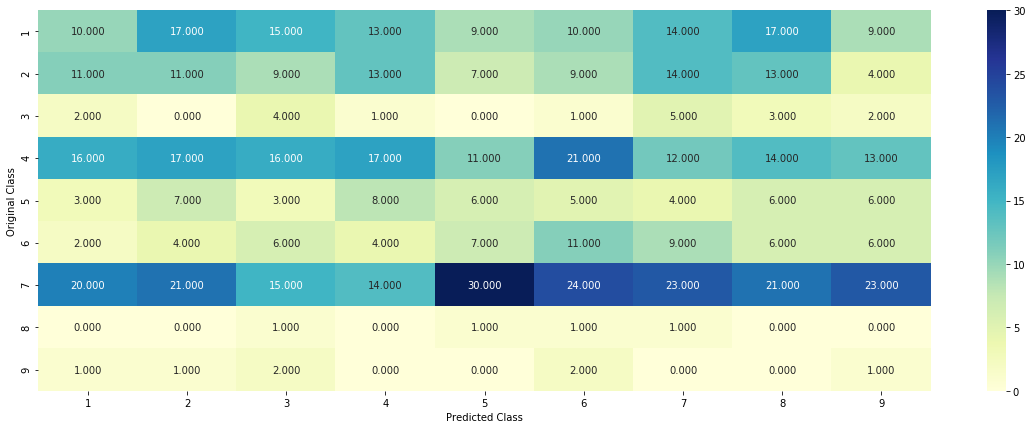

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


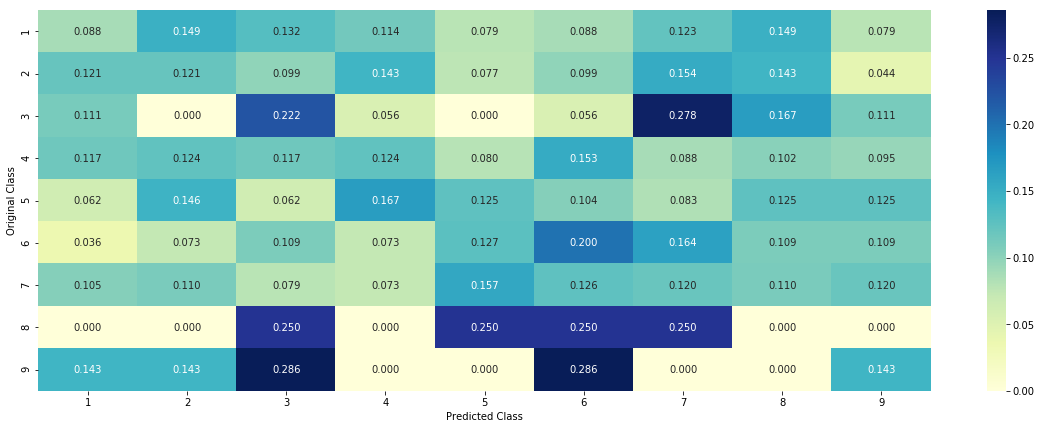

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


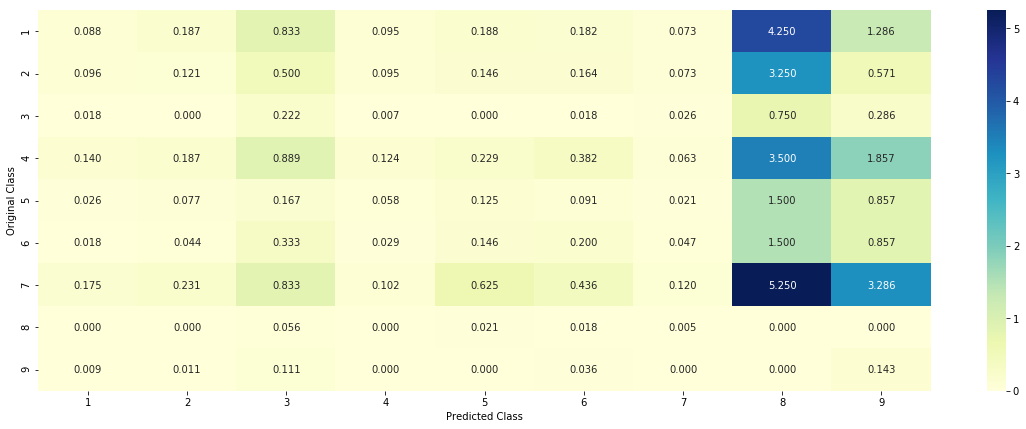

In [11]:
from sklearn.metrics.classification import log_loss
#Need to generate nine probabilities and sum of them is equal to 1.
#Solution is Generate Nine numbers and divide each of the numbers with their sum.
X_test_len = X_test.shape[0]
X_cv_len = X_cv.shape[0]

#We creat a output array that is exactly same as Cv data
y_cv_predicted = np.zeros((X_cv_len,9))
for i in range(X_cv_len):
    rand_probs = np.random.rand(1,9)
    y_cv_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation data using Random Model", log_loss(y_cv, y_cv_predicted, eps=1e-15))

# Test-Set error.
#we create a output array that has exactly same as the test data
y_test_predicted = np.zeros((X_test_len,9))
for i in range(X_test_len):
    rand_probs = np.random.rand(1,9)
    y_test_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, y_test_predicted, eps=1e-15))

y_predicted = np.argmax(y_test_predicted,axis=1)
plot_confusion_matrix(y_test, y_predicted+1)

### Univariate Analysis

In [12]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['X_train', 'X_test', 'X_cv']
# algorithm
# -----------------------------------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = X_train.loc[(X_train['Class']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Univariate Analysis on Gene feature

**1. What Type of the Feature it is?**
* Categorical Feature

**2. How many Categories are there and How they are distributed?**

In [13]:
unique_genes = X_train['Gene'].value_counts()
print("Number of unique genes:", unique_genes.shape[0])
print(unique_genes.head(10)) #Prints Top 10 Most occuring genes.

Number of unique genes: 226
BRCA1     171
TP53      108
EGFR       95
BRCA2      86
PTEN       80
KIT        63
BRAF       60
ALK        44
PDGFRA     39
ERBB2      36
Name: Gene, dtype: int64


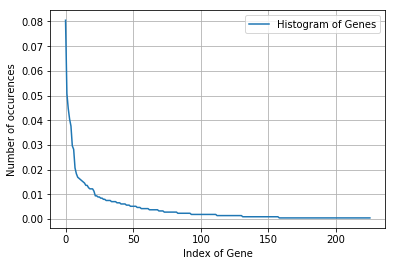

In [14]:
#Gene Distribution (Histogram)
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label="Histogram of Genes")
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.legend()
plt.grid()
plt.show()

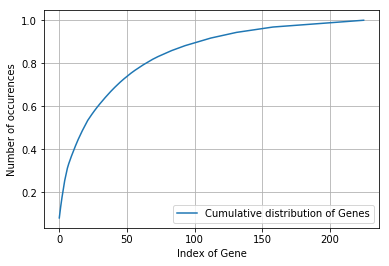

In [15]:
#Cummulative distribution of genes.
c = np.cumsum(h)
plt.plot(c, label='Cumulative distribution of Genes')
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.grid()
plt.legend()
plt.show()

**3.How to Featurize this Gene feature?**
    * CountVectorizer with both unigram and bigram.

We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, Count vectorizer is used for all the models.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer of the gene feature.
gene_countVectorizer = CountVectorizer()
train_gene_feature_countVectorizer = gene_countVectorizer.fit_transform(X_train['Gene'])
cv_gene_feature_countVectorizer = gene_countVectorizer.transform(X_cv['Gene'])
test_gene_feature_countVectorizer = gene_countVectorizer.transform(X_test['Gene'])

In [17]:
#Lets cross check the shape of the data frame
print("The shape of the train_gene_feature_countVectorizer", train_gene_feature_countVectorizer.shape)
print("The shape of the cv_gene_feature_countVectorizer", cv_gene_feature_countVectorizer.shape)
print("The shape of the test_gene_feature_countVectorizer", test_gene_feature_countVectorizer.shape)

The shape of the train_gene_feature_countVectorizer (2124, 226)
The shape of the cv_gene_feature_countVectorizer (532, 226)
The shape of the test_gene_feature_countVectorizer (665, 226)


**4.How good is this feature in predicting y_i's?**

There are Many ways to check it but simplest way is to build a simple Machine Learning Model.

For values of alpha =  1e-05 The log loss is: 1.402809053105865
For values of alpha =  0.0001 The log loss is: 1.2015371372296688
For values of alpha =  0.001 The log loss is: 1.2263602636130826
For values of alpha =  0.01 The log loss is: 1.3467535874607752
For values of alpha =  0.1 The log loss is: 1.4541654294000608
For values of alpha =  1 The log loss is: 1.4899111450450975


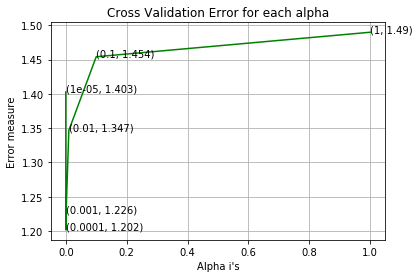

For values of best alpha =  0.0001 The train log loss is: 1.0530283763734927
For values of best alpha =  0.0001 The cross validation log loss is: 1.2015371372296688
For values of best alpha =  0.0001 The test log loss is: 1.2324157731145815


In [18]:
#SGD Classifier.
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")
#Hyper parameter for SGD classifier
alpha = [10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_countVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_countVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_countVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_countVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_countVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**5. Gene Feature stable across all the dataset(Train,Test and CV)**
* Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error.

In [19]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
cv_coverage=X_cv[X_cv['Gene'].isin(list(set(X_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  226  genes in train dataset?
Ans
1. In test data 634 out of 665 : 95.33834586466166
2. In cross validation data 514 out of  532 : 96.61654135338345


### Univariate analysis on Variation Feature

**Q1. What type of the Feature it is?**
* It is Categorical feature.

**Q2. How many Categories are there?**

In [20]:
unique_variations = X_train['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1928
Truncating_Mutations    53
Deletion                51
Amplification           45
Fusions                 24
Overexpression           4
Q61L                     3
V321M                    2
G12D                     2
K117N                    2
T167A                    2
Name: Variation, dtype: int64


In [21]:
print("Ans: There are", unique_variations.shape[0])

Ans: There are 1928


Different categories of variations in the train data, and they are distibuted as follows

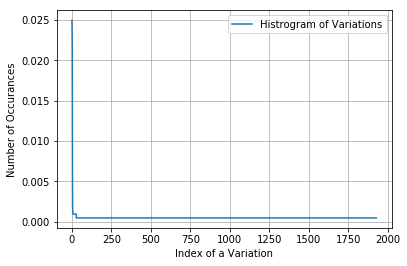

In [22]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02495292 0.04896422 0.07015066 ... 0.99905838 0.99952919 1.        ]


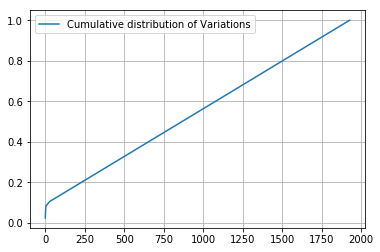

In [23]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

**Q3. How to featurize the Variation Feature?**
* Tfidf Vectorizer

We will use both of the methods to featurize variation feature.

In [24]:
# Count Vectorizer of variation feature.
variation_countVectorizer = CountVectorizer()
train_variation_feature_countVectorizer = variation_countVectorizer.fit_transform(X_train['Variation'])
test_variation_feature_countVectorizer = variation_countVectorizer.transform(X_test['Variation'])
cv_variation_feature_countVectorizer = variation_countVectorizer.transform(X_cv['Variation'])

In [25]:
print("The shape of train_variation_feature_countVectorizer is",train_variation_feature_countVectorizer.shape)
print("The shape of cv_variation_feature_countVectorizer is",cv_variation_feature_countVectorizer.shape)
print("The shape of test_variation_feature_countVectorizer is",test_variation_feature_countVectorizer.shape)

The shape of train_variation_feature_countVectorizer is (2124, 1954)
The shape of cv_variation_feature_countVectorizer is (532, 1954)
The shape of test_variation_feature_countVectorizer is (665, 1954)


**Q4. How good is that variation feature in predicting y_i's?**


For values of alpha =  1e-05 The log loss is: 1.7577949217164217
For values of alpha =  0.0001 The log loss is: 1.748606921339503
For values of alpha =  0.001 The log loss is: 1.746378136867642
For values of alpha =  0.01 The log loss is: 1.759586375864408
For values of alpha =  0.1 The log loss is: 1.771462581669408
For values of alpha =  1 The log loss is: 1.7719149712281381


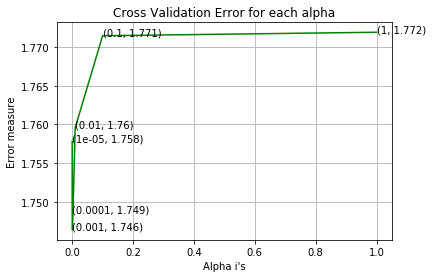

For values of best alpha =  0.001 The train log loss is: 1.120615703055144
For values of best alpha =  0.001 The cross validation log loss is: 1.746378136867642
For values of best alpha =  0.001 The test log loss is: 1.6690072802596319


In [26]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in 

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_countVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_countVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_countVectorizer)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_countVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_countVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Observation:**
* Log loss is less than Random models log loss which is 2.5
* This is an important Feature. 

**Q5. Is this Variation is Stable across all the Data sets(Train, CV and Test)?**

In [27]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
cv_coverage=X_cv[X_cv['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q12. How many data points are covered by total  1928  genes in test and cross validation data sets?
Ans
1. In test data 83 out of 665 : 12.481203007518797
2. In cross validation data 38 out of  532 : 7.142857142857142


**Observation:**
* Around 10% of the data is common between Train and CV and also Train and Test.
* This feature is less stable but it is useful feature.

### Univariate Analysis on Text data

**Q1. How Many Words are there in Train data?**

**Q2. How are Words frequencies distributed?**

**Q3. How to featurize the Text data?**

**Q4. Is the Text feature is useful in predicting y_i's?**

**Q5. Is the Text Feature stable across Train, cv and Test?**

In [28]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
from collections import defaultdict

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['Text'].split():
            dictionary[word] +=1
    return dictionary

In [29]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))
            row_index += 1
    return text_feature_responseCoding

In [31]:
# building a CountVectorizer with all the words that occured atleast 3 times in train data
text_countVectorizer = CountVectorizer(min_df=3, ngram_range=(1,2))
train_text_feature_countVectorizer = text_countVectorizer.fit_transform(X_train['Text'])
# getting all the feature names (words)
train_text_features= text_countVectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_countVectorizer.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 770344


In [32]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(X_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [33]:
#Count Vectorizer.
from sklearn.preprocessing import normalize
# don't forget to normalize every feature
train_text_feature_countVectorizer = normalize(train_text_feature_countVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_countVectorizer = text_countVectorizer.transform(X_test['Text'])
# don't forget to normalize every feature
test_text_feature_countVectorizer = normalize(test_text_feature_countVectorizer, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_countVectorizer = text_countVectorizer.transform(X_cv['Text'])
# don't forget to normalize every feature
cv_text_feature_countVectorizer = normalize(cv_text_feature_countVectorizer, axis=0)

In [34]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [35]:
# Number of words for a given frequency.
from collections import Counter
print(Counter(sorted_text_occur))

Counter({3: 143552, 4: 113991, 5: 67043, 6: 60304, 7: 51229, 8: 43235, 10: 23306, 9: 21906, 11: 19043, 14: 18715, 12: 18573, 13: 15769, 16: 11643, 15: 11155, 21: 8401, 17: 6758, 18: 6459, 19: 5575, 20: 5441, 22: 4929, 23: 4554, 24: 4402, 25: 4388, 29: 3991, 32: 3788, 27: 3711, 26: 3685, 40: 3601, 28: 3420, 30: 2849, 42: 2542, 33: 2356, 31: 2229, 51: 2208, 34: 1844, 35: 1787, 36: 1786, 37: 1474, 38: 1430, 41: 1418, 39: 1402, 67: 1400, 43: 1337, 58: 1292, 44: 1215, 46: 1126, 45: 1123, 48: 1037, 50: 999, 52: 945, 47: 937, 49: 913, 53: 861, 54: 842, 56: 757, 55: 747, 57: 705, 60: 635, 59: 634, 64: 624, 61: 609, 63: 592, 62: 586, 69: 579, 68: 578, 70: 572, 84: 551, 66: 529, 72: 498, 65: 491, 71: 483, 74: 451, 73: 451, 78: 421, 80: 391, 75: 389, 77: 387, 81: 376, 76: 373, 85: 339, 82: 339, 79: 336, 83: 330, 88: 313, 87: 308, 92: 286, 86: 286, 90: 284, 102: 283, 91: 259, 89: 255, 98: 250, 93: 247, 94: 246, 95: 244, 96: 238, 104: 234, 97: 227, 100: 222, 99: 216, 103: 202, 105: 195, 116: 188, 1

For values of alpha =  1e-05 The log loss is: 1.4920961205581875
For values of alpha =  0.0001 The log loss is: 1.4989031234077268
For values of alpha =  0.001 The log loss is: 1.4474780136098444
For values of alpha =  0.01 The log loss is: 1.222249970605504
For values of alpha =  0.1 The log loss is: 1.2471745733081545
For values of alpha =  1 The log loss is: 1.3278906753048263


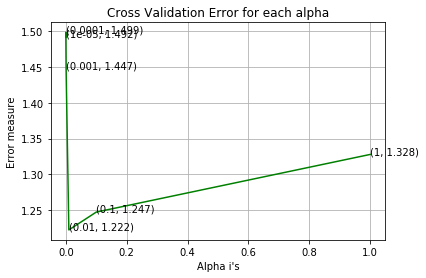

For values of best alpha =  0.01 The train log loss is: 0.8491813166010385
For values of best alpha =  0.01 The cross validation log loss is: 1.222249970605504
For values of best alpha =  0.01 The test log loss is: 1.3304043916817772


In [36]:
# Train a Logistic regression+Calibration model using text features whicha count vectorizer
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_countVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_countVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_countVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_countVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_countVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Q. Is the Text feature stable across all the data sets (Test, Train, Cross validation)?**

In [37]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [38]:
len1,len2 = get_intersec_text(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

95.993 % of word of test data appeared in train data
97.67 % of word of Cross Validation appeared in train data


**Observation:**
* The text feature is Stable across all the Train, test and Cross Validation.

### Machine Learning Models

In [39]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [40]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [41]:
# This function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3, ngram_range=(1,2))
    
    gene_vec = gene_count_vec.fit(X_train['Gene'])
    var_vec  = var_count_vec.fit(X_train['Variation'])
    text_vec = text_count_vec.fit(X_train['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Stacking Three Features

In [42]:
from scipy.sparse import hstack
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

#TfidfVectorizer
train_gene_var_countVectorizer = hstack((train_gene_feature_countVectorizer,train_variation_feature_countVectorizer))
test_gene_var_countVectorizer = hstack((test_gene_feature_countVectorizer,test_variation_feature_countVectorizer))
cv_gene_var_countVectorizer = hstack((cv_gene_feature_countVectorizer,cv_variation_feature_countVectorizer))

train_x_countVectorizer = hstack((train_gene_var_countVectorizer, train_text_feature_countVectorizer)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_countVectorizer = hstack((test_gene_var_countVectorizer, test_text_feature_countVectorizer)).tocsr()
test_y = np.array(list(X_test['Class']))

cv_x_countVectorizer = hstack((cv_gene_var_countVectorizer, cv_text_feature_countVectorizer)).tocsr()
cv_y = np.array(list(X_cv['Class']))


In [43]:
print("CountVectorizer features :")
print("(number of data points * number of features) in train data = ", train_x_countVectorizer.shape)
print("(number of data points * number of features) in test data = ", test_x_countVectorizer.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_countVectorizer.shape)

CountVectorizer features :
(number of data points * number of features) in train data =  (2124, 772524)
(number of data points * number of features) in test data =  (665, 772524)
(number of data points * number of features) in cross validation data = (532, 772524)


### BaseLine Models

### Logistic Regression(With Class balancing)

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.5904814242263388
for alpha = 1e-05
Log Loss : 1.5822513597602206
for alpha = 0.0001
Log Loss : 1.5627483810453269
for alpha = 0.001
Log Loss : 1.4972907196157998
for alpha = 0.01
Log Loss : 1.2312883886297326
for alpha = 0.1
Log Loss : 1.2396469043430483
for alpha = 1
Log Loss : 1.3087166312163412
for alpha = 10
Log Loss : 1.371712822047854
for alpha = 100
Log Loss : 1.3862123732963776


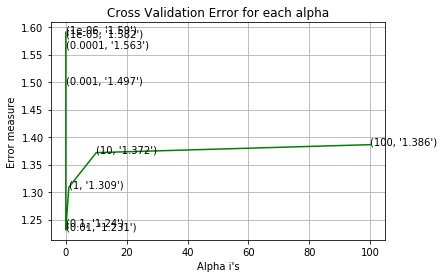

For values of best alpha =  0.01 The train log loss is: 0.8343964126743844
For values of best alpha =  0.01 The cross validation log loss is: 1.2312883886297326
For values of best alpha =  0.01 The test log loss is: 1.3026344729879564


In [45]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# -------------------------------------------------------------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------------------------------------------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#---------------------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_countVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_countVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_countVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_countVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_countVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing the Model with best hyperParameter

Log loss : 1.2312883886297326
Number of mis-classified points : 0.40037593984962405
-------------------------------------------------- Confusion Matrix --------------------------------------------------


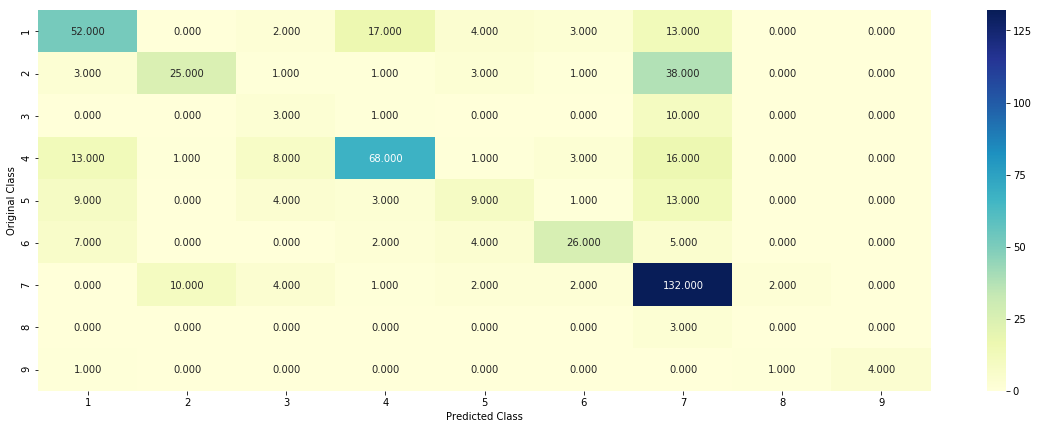

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


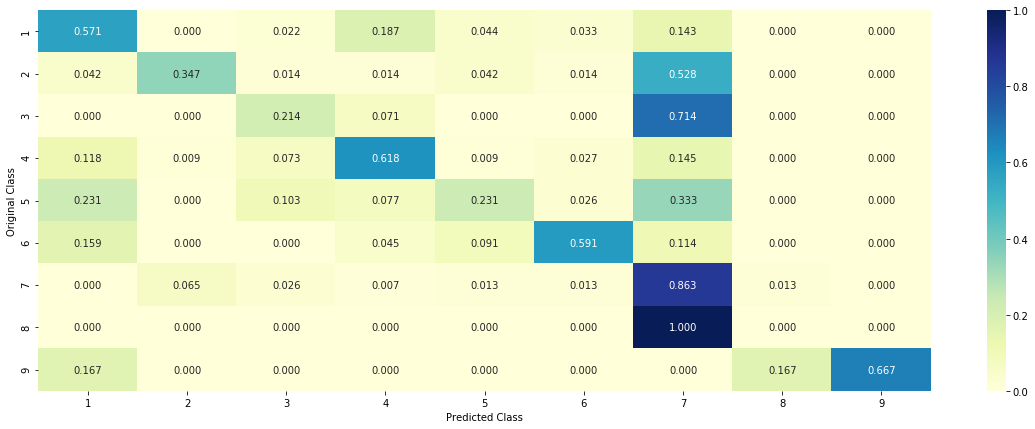

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


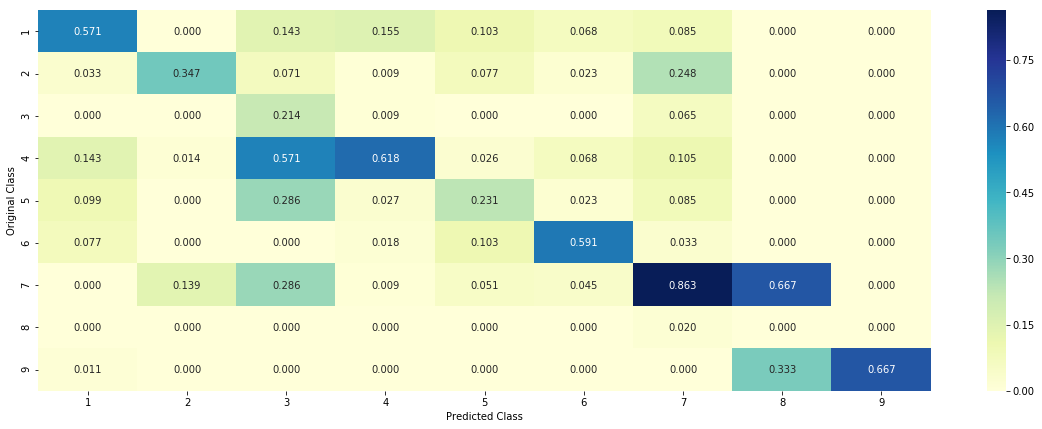

In [46]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_countVectorizer, train_y, cv_x_countVectorizer, cv_y, clf)

#### Feature Importance

In [47]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_countVectorizer.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### Query Point-1

In [61]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_countVectorizer,train_y)
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_countVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_countVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1189 0.1475 0.0135 0.0949 0.0529 0.0214 0.5395 0.0084 0.003 ]]
Actual Class : 2
--------------------------------------------------
241 Text feature [stat] present in test data point [True]
354 Text feature [stat5] present in test data point [True]
442 Text feature [jak] present in test data point [True]
Out of the top  500  features  3 are present in query point


#### Query Point-2

In [62]:
test_point_index = 122
no_feature = 500
predicted_cls = sig_clf.predict(test_x_countVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_countVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0631 0.1016 0.0126 0.0411 0.2946 0.0148 0.4599 0.0102 0.0021]]
Actual Class : 5
--------------------------------------------------
Out of the top  500  features  0 are present in query point


### Logistic Regression(Without Class balancing) 

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.4834806893968648
for alpha = 1e-05
Log Loss : 1.4804453131514066
for alpha = 0.0001
Log Loss : 1.4837522215351484
for alpha = 0.001
Log Loss : 1.4572219130785806
for alpha = 0.01
Log Loss : 1.2156764071901411
for alpha = 0.1
Log Loss : 1.2396866874258141
for alpha = 1
Log Loss : 1.3215485757108012


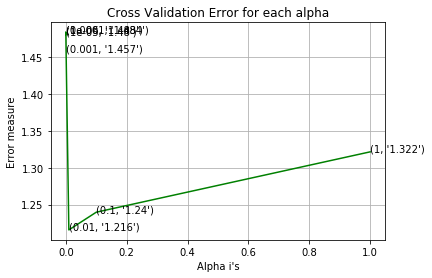

For values of best alpha =  0.01 The train log loss is: 0.8261609296708833
For values of best alpha =  0.01 The cross validation log loss is: 1.2156764071901411
For values of best alpha =  0.01 The test log loss is: 1.313358746124302


In [47]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_countVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_countVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_countVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_countVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_countVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_countVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.2156764071901411
Number of mis-classified points : 0.3966165413533835
-------------------------------------------------- Confusion Matrix --------------------------------------------------


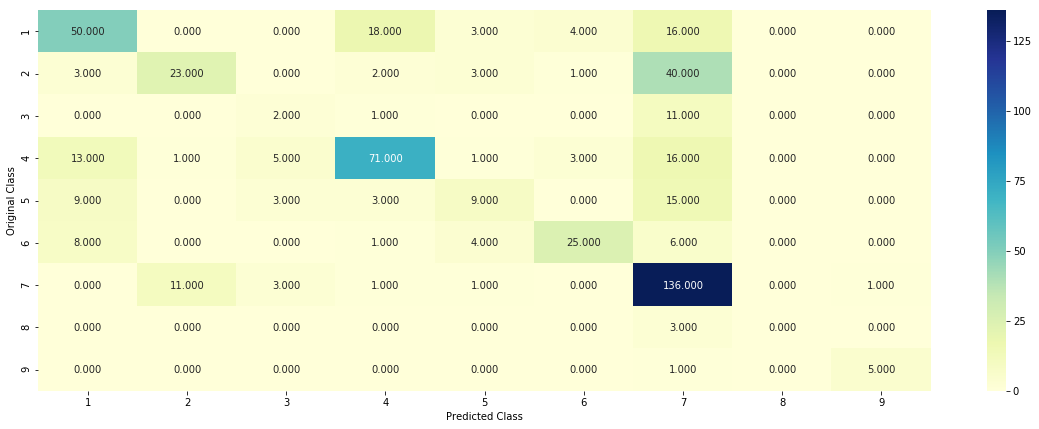

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


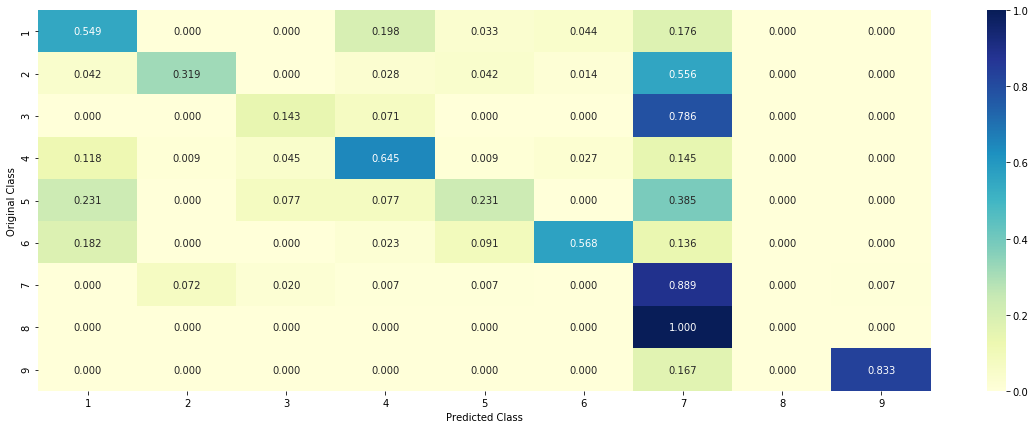

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


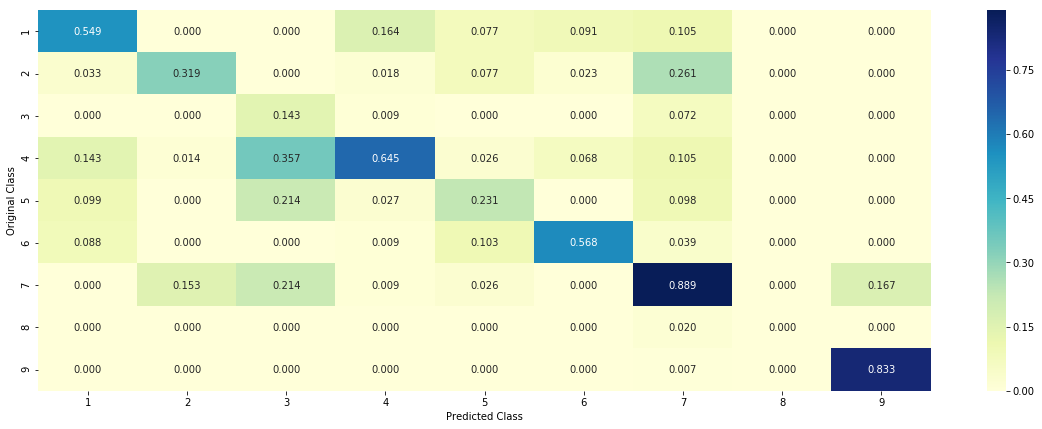

In [48]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
#------------------------------------------------------------------------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_countVectorizer, train_y, cv_x_countVectorizer, cv_y, clf)

#### Query Point-1

In [50]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_countVectorizer,train_y)
test_point_index = 90
no_feature = 500
predicted_cls = sig_clf.predict(test_x_countVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_countVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1437 0.1501 0.0181 0.1932 0.0651 0.052  0.3618 0.0067 0.0093]]
Actual Class : 2
--------------------------------------------------
159 Text feature [oncogene] present in test data point [True]
Out of the top  500  features  1 are present in query point


#### Query Point-2

In [49]:
test_point_index = 120
no_feature = 500
predicted_cls = sig_clf.predict(test_x_countVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_countVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0368 0.8803 0.0024 0.0217 0.0155 0.0039 0.0332 0.0034 0.0027]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point
